In [55]:
%matplotlib inline

In [56]:
import bt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = bt.get('aapl,msft,c,gs,ge', start='2010-01-01')
sma = data.rolling(50).mean()


In [57]:
data

,aapl,msft,c,gs,ge
Date,,,,,
2010-01-04,6.544686,23.855656,29.037785,143.733429,87.658882
2010-01-05,6.556002,23.863363,30.148046,146.274597,88.112762
2010-01-06,6.451721,23.716915,31.087503,144.713348,87.658882
2010-01-07,6.439793,23.470264,31.172911,147.545212,92.197823
2010-01-08,6.482606,23.632132,30.660475,144.754898,94.183640
...,...,...,...,...,...
2022-04-19,167.399994,285.299988,52.919998,335.950012,91.900002
2022-04-20,167.229996,286.359985,53.099998,341.059998,91.400002
2022-04-21,166.419998,280.809998,52.630001,334.299988,91.720001


In [58]:
sma

,aapl,msft,c,gs,ge
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-04-19,167.532201,295.560739,57.6574,337.452416,93.447870
2022-04-20,167.443600,295.281359,57.3922,336.953763,93.279663
2022-04-21,167.275400,294.818928,57.1024,336.281140,93.129646


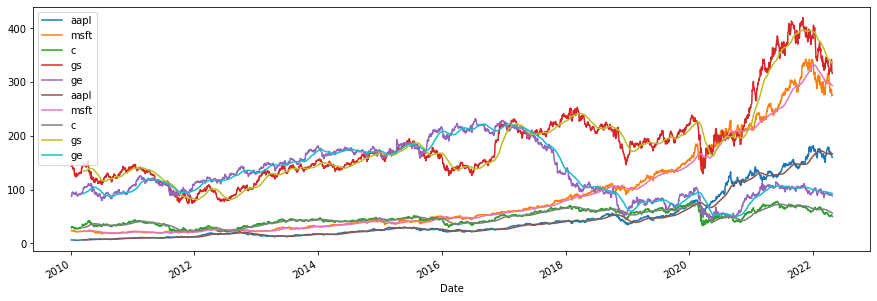

In [61]:
plot = bt.merge(data, sma).plot(figsize=(15, 5))

In [24]:
class SelectWhere(bt.Algo):

    """
    Selects securities based on an indicator DataFrame.

    Selects securities where the value is True on the current date (target.now).

    Args:
        * signal (DataFrame): DataFrame containing the signal (boolean DataFrame)

    Sets:
        * selected

    """
    def __init__(self, signal):
        self.signal = signal

    def __call__(self, target):
        # get signal on target.now
        if target.now in self.signal.index:
            sig = self.signal.loc[target.now]

            # get indices where true as list
            selected = list(sig.index[sig])

            # save in temp - this will be used by the weighing algo
            target.temp['selected'] = selected

        # return True because we want to keep on moving down the stack
        return True

In [25]:
signal = data > sma


In [26]:
s = bt.Strategy('above50sma', [SelectWhere(data > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

In [27]:
t = bt.Backtest(s, data)

In [28]:
res = bt.run(t)

<AxesSubplot:title={'center':'Equity Progression'}>

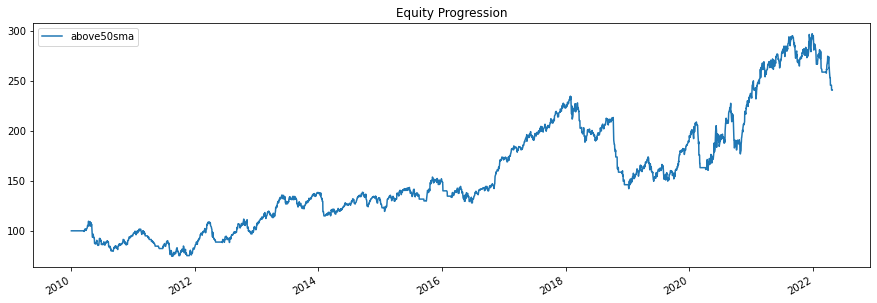

In [62]:
res.plot()


In [65]:
res.display()

Stat                 above50sma
-------------------  ------------
Start                2010-01-03
End                  2022-04-25
Risk-free rate       0.00%

Total Return         140.69%
Daily Sharpe         0.46
Daily Sortino        0.71
CAGR                 7.40%
Max Drawdown         -39.43%
Calmar Ratio         0.19

MTD                  -10.25%
3m                   -9.70%
6m                   -11.68%
YTD                  -17.61%
1Y                   -10.30%
3Y (ann.)            12.46%
5Y (ann.)            5.29%
10Y (ann.)           10.12%
Since Incep. (ann.)  7.40%

Daily Sharpe         0.46
Daily Sortino        0.71
Daily Mean (ann.)    9.05%
Daily Vol (ann.)     19.47%
Daily Skew           -0.63
Daily Kurt           4.67
Best Day             5.78%
Worst Day            -8.26%

Monthly Sharpe       0.44
Monthly Sortino      0.72
Monthly Mean (ann.)  9.62%
Monthly Vol (ann.)   21.93%
Monthly Skew         -0.40
Monthly Kurt         0.76
Best Month           21.65%
Worst Month        